### 로지스틱 회귀

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape) #이미지 1797개, 8x8의 64차원
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


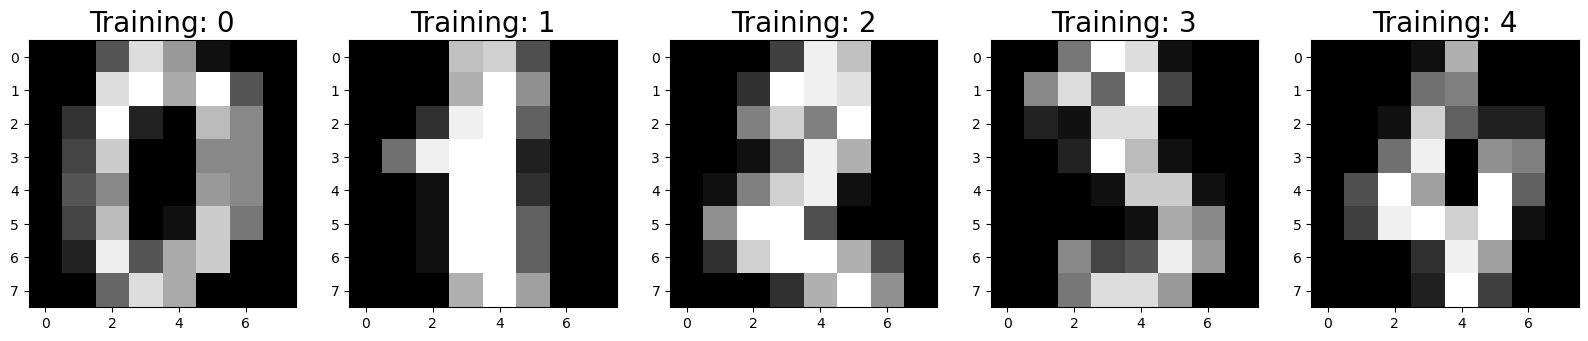

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}', fontsize = 20)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

c:\Users\Hyeonseok\anaconda3\envs\torch_study\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
logisticRegr.predict(x_test[0].reshape(1,-1)) #새로운 이미지에 대한 예측 결과를 넘파이 배열로 출력
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [7]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


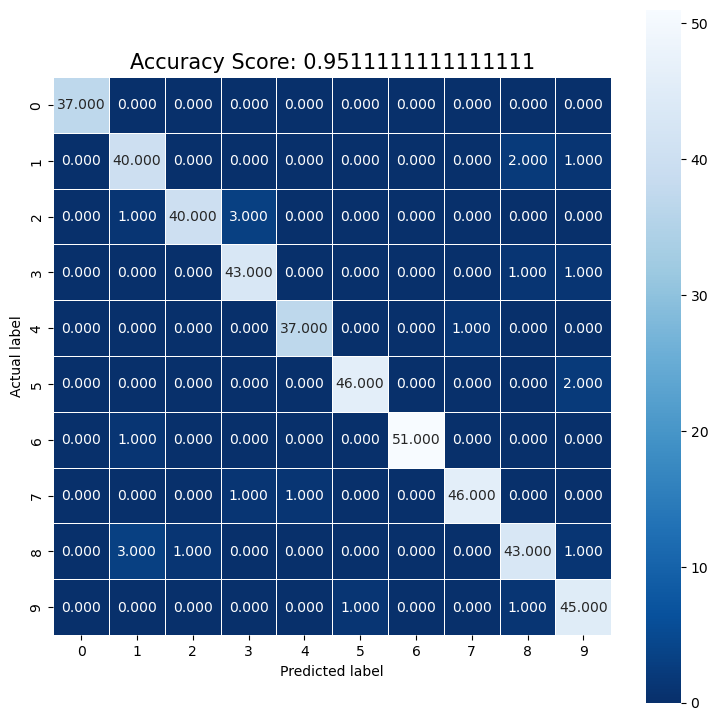

In [10]:
import numpy as np 
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.set_title(f'Accuracy Score: {score}', size = 15)
plt.show()

### 선형회귀

In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

dataset = pd.read_csv('data/weather.csv')

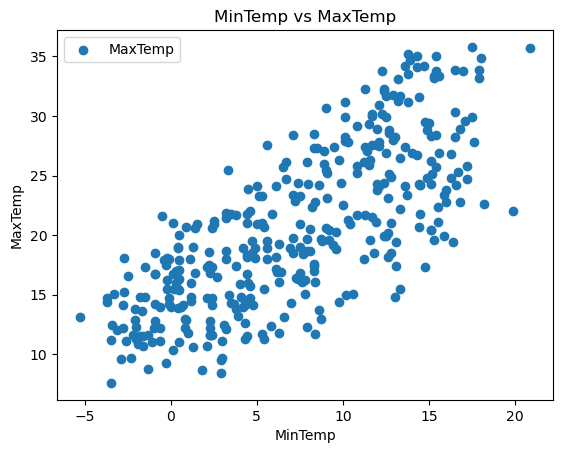

In [30]:
fig, ax = plt.subplots()
ax.scatter(dataset.MinTemp, dataset.MaxTemp, marker='o', label='MaxTemp')
ax.set_title('MinTemp vs MaxTemp')
ax.set_xlabel('MinTemp')
ax.set_ylabel('MaxTemp')
ax.legend()
plt.show()

In [31]:
x = dataset['MinTemp'].values.reshape(-1, 1)
y = dataset['MaxTemp'].values.reshape(-1 ,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

regressor = LinearRegression() #선형회귀 메소드
regressor.fit(x_train, y_train) #훈련

LinearRegression()

In [34]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,18.5,24.026045
1,13.0,15.118312
2,24.3,24.188004
3,34.1,26.050530
4,14.7,16.171044
...,...,...
69,27.1,23.702127
70,28.6,24.754859
71,11.3,17.952590
72,33.8,26.941303


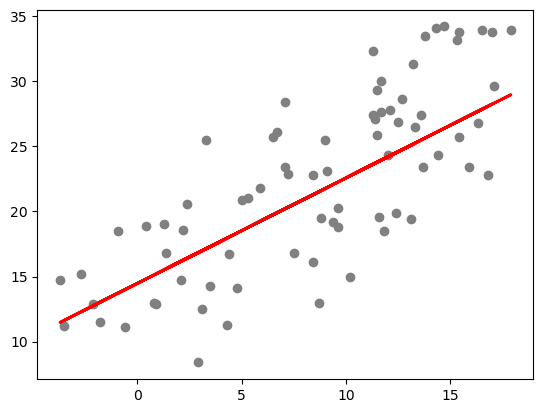

In [38]:
fig, ax = plt.subplots()
ax.scatter(x_test, y_test, color='gray')
ax.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [39]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱번:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 20.70798863043554
루트 평균제곱번: 4.550603106230595
